In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts')))

In [7]:
from analysis import handset_and_manufacturer_analysis, user_behavior_analysis, handle_missing_values, describe_dataset, decile_segmentation, bivariate_analysis, correlation_analysis, perform_pca

In [4]:
# Load the dataset
df = pd.read_csv('../data/telecom.csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
# 1. Handset and Manufacturer Analysis
top_handsets, top_manufacturers, top_5_per_manufacturer = handset_and_manufacturer_analysis(df)
print("Top 10 Handsets:\n", top_handsets)
print("Top 3 Manufacturers:\n", top_manufacturers)
print("Top 5 Handsets per Manufacturer:\n", top_5_per_manufacturer)

Top 10 Handsets:
 Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64
Top 3 Manufacturers:
 Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64
Top 5 Handsets per Manufacturer:
 Handset Manufacturer                     Handset Type                     
A-Link Telecom International Co Limited  A-Link Telecom I. Cubot X18 Plus        2
                                         A-Link Telecom I. Cubot A5              1
                                         A-Link Telecom I. Cubot Note Plus       1
                                         A-Link Telecom I. Cubot Note S          1
  

In [8]:
# 2. User Behavior Analysis
user_behavior = user_behavior_analysis(df)
print(user_behavior.head())

              Bearer Id  Dur. (ms)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
IMSI                                                                   
2.040471e+14          1   869844.0              0.0              0.0   
2.040808e+14          1   877385.0              0.0              0.0   
2.082001e+14          1    86019.0            402.0            453.0   
2.082001e+14          1    86254.0         726631.0         168695.0   
2.082001e+14          2   573923.0              0.0              0.0   

              Total DL (Bytes)  Total UL (Bytes)  Total Data Volume  
IMSI                                                                 
2.040471e+14        78697597.0        60456049.0       1.391536e+08  
2.040808e+14       194828056.0        37295915.0       2.321240e+08  
2.082001e+14        31376981.0        53794658.0       8.517164e+07  
2.082001e+14       392918313.0        33583272.0       4.265016e+08  
2.082001e+14       961767023.0        71325004.0       1.033092e+09  


In [9]:
# 3. Handle Missing Values
df_clean = handle_missing_values(df)
print(df_clean.isnull().sum()) 

/home/kali/Desktop/vs/TellCO_purchasing/scripts/analysis.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [10]:

# 4. Describe Dataset
print(describe_dataset(df_clean))

          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.500010e+05  150001.000000  150001.000000  1.500010e+05  1.500010e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.883600e+18     288.610872     288.096693  8.103735e+04  2.144722e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744200e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324300e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.500010e+05  1.500010e+05    150001.000000    150001.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.438731e+12  2.237359e+13       559.342620   

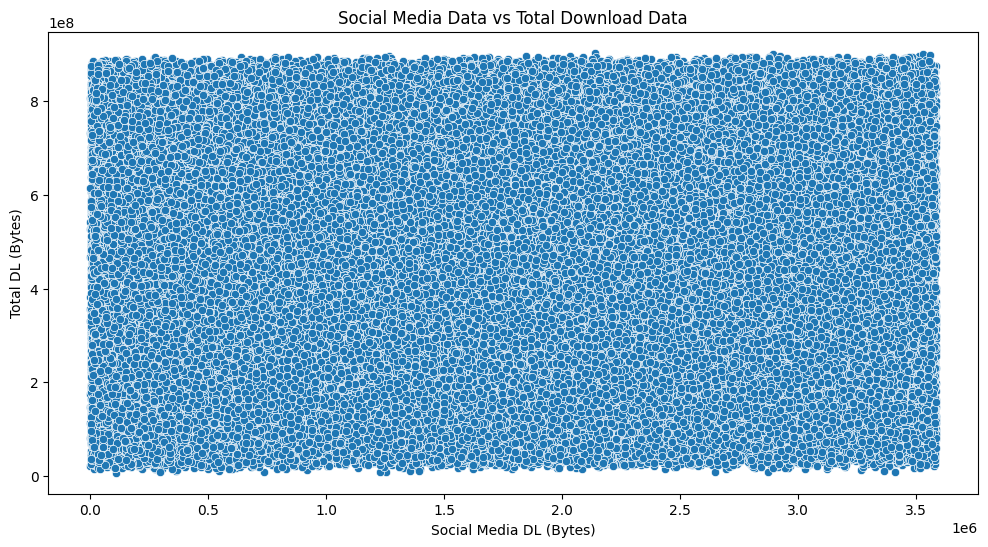

In [12]:
# 6. Bivariate Analysis
bivariate_analysis(df_clean)

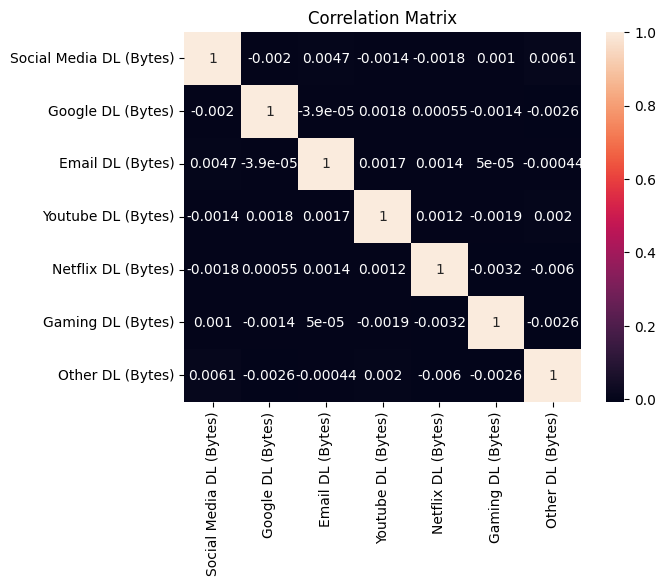

In [13]:

# 7. Correlation Analysis
correlation_matrix = correlation_analysis(df_clean)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [14]:
# 8. PCA Analysis
pca_result, explained_variance = perform_pca(df_clean)
print("Explained Variance by PCA Components:", explained_variance)

Explained Variance by PCA Components: [0.501595   0.49753482]
